<a href="https://colab.research.google.com/github/shota74/-/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------------------------------
input   : tensor([[ 0.7883, -0.5064,  0.3496]])
output : tensor([[ 0.8256, -0.5026,  0.2867]])
hidd   : tensor([[ 1.1945, -1.4862]])
---------------------------------------------------
input   : tensor([[ 0.2358, -0.0488,  0.9706]])
output : tensor([[ 0.2282, -0.0183,  0.9799]])
hidd   : tensor([[ 0.2883, -0.6386]])
---------------------------------------------------
input   : tensor([[0.0445, 0.2040, 0.9780]])
output : tensor([[0.0735, 0.2126, 0.9944]])
hidd   : tensor([[-0.0550, -0.4429]])
---------------------------------------------------
input   : tensor([[-0.1410, -0.9571,  0.2533]])
output : tensor([[-0.1251, -0.9442,  0.2799]])
hidd   : tensor([[ 1.7115, -0.0325]])
---------------------------------------------------
input   : tensor([[-0.0417, -0.2661,  0.9630]])
output : tensor([[-0.0544, -0.2582,  0.9810]])
hidd   : tensor([[ 0.6012, -0.1869]])
---------------------------------------------------
input   : tensor([[-0.0123, -

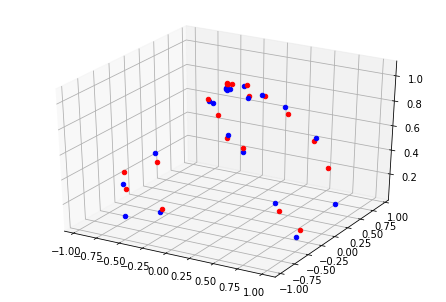

<Figure size 432x288 with 0 Axes>

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import DataLoader
from torch.utils import data
from torchvision import transforms
import math
import random
import torch.optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

#ネットワークの定義
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder,self).__init__()

        self.encoder1 = nn.Linear(3, 10)
        self.encoder2 = nn.Linear(10,2)
        self.decoder1 = nn.Linear(2,10)
        self.decoder2 = nn.Linear(10,3)

        self.sigmoid = nn.Sigmoid()



    def forward(self, x, hidden=False):
        x = self.encoder1(x)
        x = self.sigmoid(x)
        x2 = self.encoder2(x)
        x = self.decoder1(x2)
        x = self.sigmoid(x)
        x = self.decoder2(x)
        if hidden:
            return x2
        else:
            return x
    

#データセットの作成
xyz = np.zeros((100,3))

for i in range(len(xyz[:,0])):
    theta = random.uniform(0,2*math.pi)
    phi = random.uniform(0,math.pi/2)
    xyz[i,0] = math.cos(theta) * math.sin(phi)
    xyz[i,1] = math.sin(theta) * math.sin(phi)
    xyz[i,2] = math.cos(phi)

xyz = xyz.astype(np.float32)



class MyDataset(data.Dataset):

    def __init__(self, data, label, transform=None):
        self.transform = transform
        self.data = data
        self.data_num = len(data)
        self.label = label

    def __len__(self):
        return self.data_num

    def __getitem__(self, idx):
        out_data = self.transform(self.data)[0][idx]
        out_label = self.label[idx]

        return out_data, out_label

transform = transforms.Compose([transforms.ToTensor()])
#trainとtestに分割
train_dataset = MyDataset(xyz[0:80,:], xyz[0:80,:], transform)
test_dataset = MyDataset(xyz[80:100,:], xyz[80:100,:], transform)


train_loder = DataLoader(train_dataset, batch_size=1, shuffle=True, sampler=None, num_workers=0)
test_loder = DataLoader(test_dataset, batch_size=1, shuffle=False, sampler=None,  num_workers=0)


#学習回数
epoch = 300
#lr = 0.01

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = autoencoder().to(device)

#損失の定義
criterion = nn.MSELoss()
#オプティマイザーの定義
optimizar = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)

#学習
for i in range(epoch):
    model.train()
    for (input, label) in train_loder:
        input, label = input.to(device), label.to(device)
        optimizar.zero_grad()
        output = model(input)
        loss = criterion(output, label)
        #print(loss)
        loss.backward()
        optimizar.step()

#評価
model.eval()
fig = plt.figure()
ax = Axes3D(fig)
fig2 = plt.figure()
with torch.no_grad():
    for (input, label) in test_loder:
        input, label = input.to(device), label.to(device)
        output = model(input,hidden=True)
        output2 = model(input)
        print('---------------------------------------------------')
        print('input   :',input)
        print('output :',output2)
        print('hidd   :',output)
        input = input.to('cpu').detach().numpy().copy()
        output2 = output2.to('cpu').detach().numpy().copy()
        output = output.to('cpu').detach().numpy().copy()
        ax.scatter(input[0,0],input[0,1],input[0,2], c ='b')
        ax.scatter(output2[0,0],output2[0,1],output2[0,2], c ='r')
        #ax.scatter(output[0,0],output[0,1], c ='g')
        




